# Goal:  predict whether a passenger on the titanic would have been survived or not.<br/>Metric: accuracy = 90%.   

In [1]:
#import libraries

# linear algebra library
import numpy as np

# data processing librabry
import pandas as pd

## data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.model_selection import train_test_split , learning_curve , GridSearchCV ,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.feature_selection import SelectKBest

# metrics libraries
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix



In [42]:
#reading dataset from CVS file
data = pd.read_csv('train.csv')
final_test = pd.read_csv('test.csv')

In [43]:
final_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# to see if our DataFrame was loaded correctly  
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1 Exploratory Data Analysis

# 1.1 Analyse de forme:

    - Target variable: Survived

    - Rows and columns: (891, 12)

    - Types of variables: float64(2), int64(5), object(5) 

    - Missing values analysis:there are not many missig values (Age , Cabin)


## 1.2 Analyse de fond                               

    - target visualization:38% survived , 61% not survived


    - Signification des variables:

            survival - Survival (0 = No; 1 = Yes)

            class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

            name - Name

            sex - Sex

            age - Age

            sibsp - Number of Siblings/Spouses Aboard

            parch - Number of Parents/Children Aboard

            ticket - Ticket Number

            fare - Passenger Fare

            cabin - Cabin

            embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

    - Continuous variables :  sauf l'âge suit une distribution assez normale , la majorité entre 19 et 45 ans  , 'fare' on peut le standardiser plus tard.

    - categorical variables: 'Sex' , 'Embarked' il faut les encoder , beacaup des passagers sont morts dans la catastrophe ,on remarque que la plupart des gens voyagent dans  la 3eme classe , on remarque aussi qu'il y a  plus  d'hommes que  de femmes (environ le double) , la plupart des passagers sont montés depuis Southampton. 

    - variables/target relationship:
    
       ** Continuous variables/ target relationship:  l'âge moyen des survivants 28 ans: les jeunes ont plus de chance de survivre,les personnes qui payaient des taux plus éléves avaient plus de chances de survivre(se sont les passagers de 1ere classe), il semble que les parents ont sauvé les enfants avant eux , si un passager a des frères et soeurs, il a moins de chance de survivre.
       
        ** categorical variables / target relationship : beacaup de personnes ont servécu de la 1ere classe(hypothèse  a tester : est ce que les riches ont plus de chance de survie que les autres ) , la plupart des femmes ont servécu et la plupart des hommes sont mort dans le naufrage.
  

## 1.3 Analyse plus détaillé

    -  variable/variable relationship :# 96% des femmes de 1ere classe ont servecu , selement 13% des hommes de 3ere classe on servecu.
    
    - parch / SibSP :37%  de correlation.
    
    - Survived / fare : 26% de correlation.

### 1.1 Analyse de la forme 

In [5]:
# create a copy of trainset 
df = data.copy()

In [7]:
# number of rows and columns
df.shape

(891, 12)

In [8]:
# types of variables:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

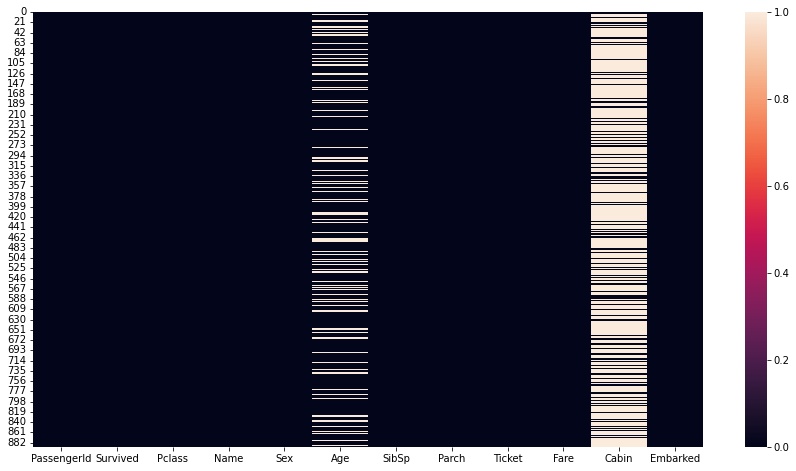

In [9]:
# NAN values 
plt.figure(figsize = (15,8))
sns.heatmap(df.isna())

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.2  Analyse de fond 

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64


<AxesSubplot:ylabel='Survived'>

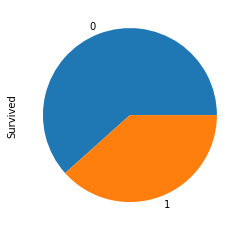

In [14]:
#Target visualization
print(df['Survived'].value_counts(normalize = True))
df['Survived'].value_counts(normalize = True).plot.pie()


In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# drop useless columns:
df = df.drop(['PassengerId','Name','Ticket','Cabin'] , axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# separate numerical and categorical variables
df_num =df [['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived', 'Pclass','Sex','Embarked']]

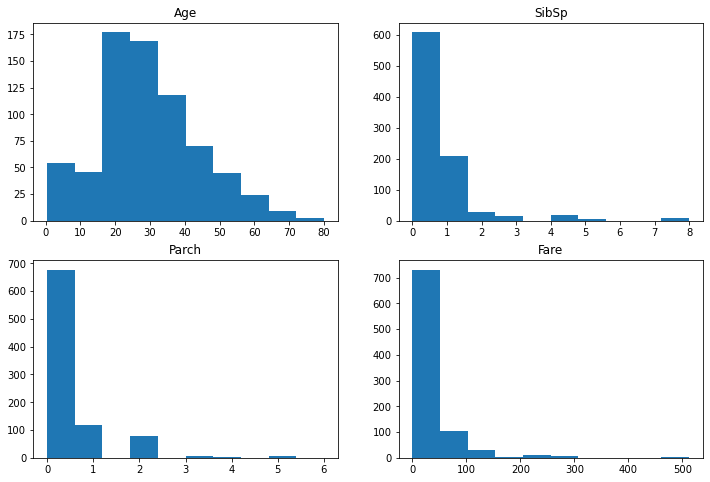

In [23]:
# Continuous variables
pos = 1
plt.figure(figsize = (12,8))
for col in df_num.columns:
    plt.subplot(2,2,pos)
    pos = pos +1
    plt.hist(df_num[col])
    plt.title(col) 
    


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


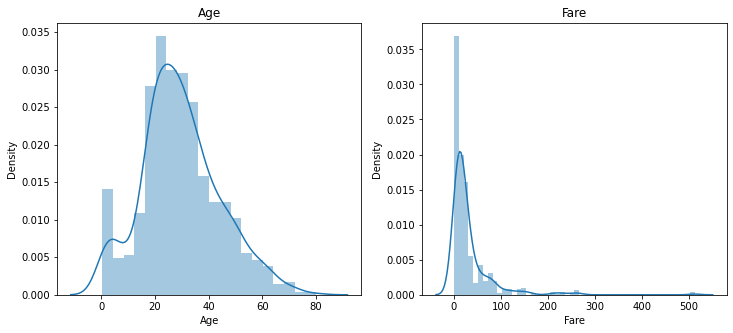

In [24]:
# Continuous variables
pos = 1
plt.figure(figsize = (12,5))
for col in df_num.select_dtypes('float'):
    plt.subplot(1,2,pos)
    pos = pos +1
    sns.distplot(df_num[col])
    plt.title(col) 

In [25]:
# categorical variables : 
for col in df_cat.columns:
    print(f'{col :-<50} , {df_cat[col].unique()}')

Survived------------------------------------------ , [0 1]
Pclass-------------------------------------------- , [3 1 2]
Sex----------------------------------------------- , ['male' 'female']
Embarked------------------------------------------ , ['S' 'C' 'Q' nan]


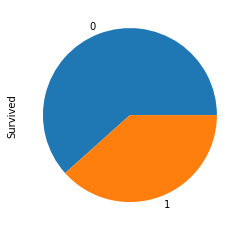

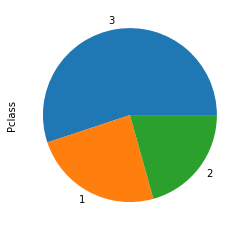

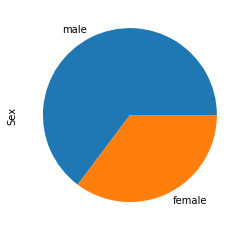

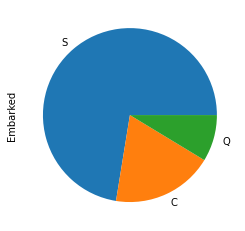

In [26]:
# categorical variables
for col in df_cat.columns:
    plt.figure()
    df_cat[col].value_counts().plot.pie()
    
    


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


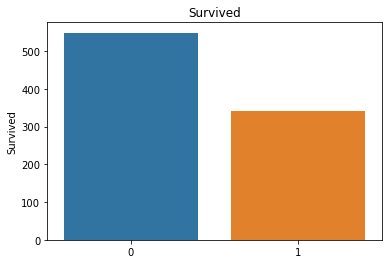

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


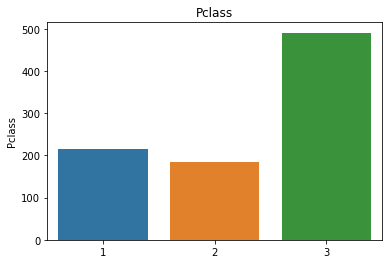

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


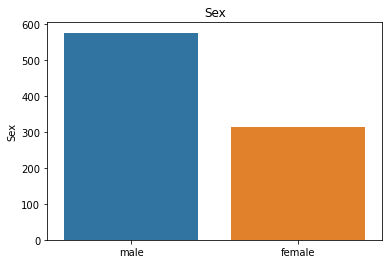

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


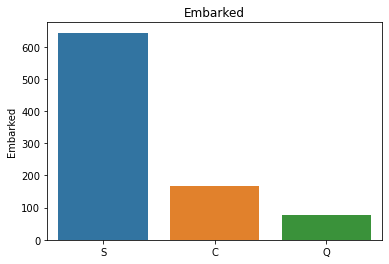

In [27]:
# categorical variables
for col in df_cat.columns:
    sns.barplot(df_cat[col].value_counts().index , df_cat[col].value_counts())
    plt.title(col)
    plt.show()

In [31]:
# continuous variable /target:
pd.pivot_table( df, index ='Survived' , values =df_num.columns )

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [32]:
# Categorical variables /target 
df_cat.groupby(['Pclass' , 'Sex']).mean() 

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

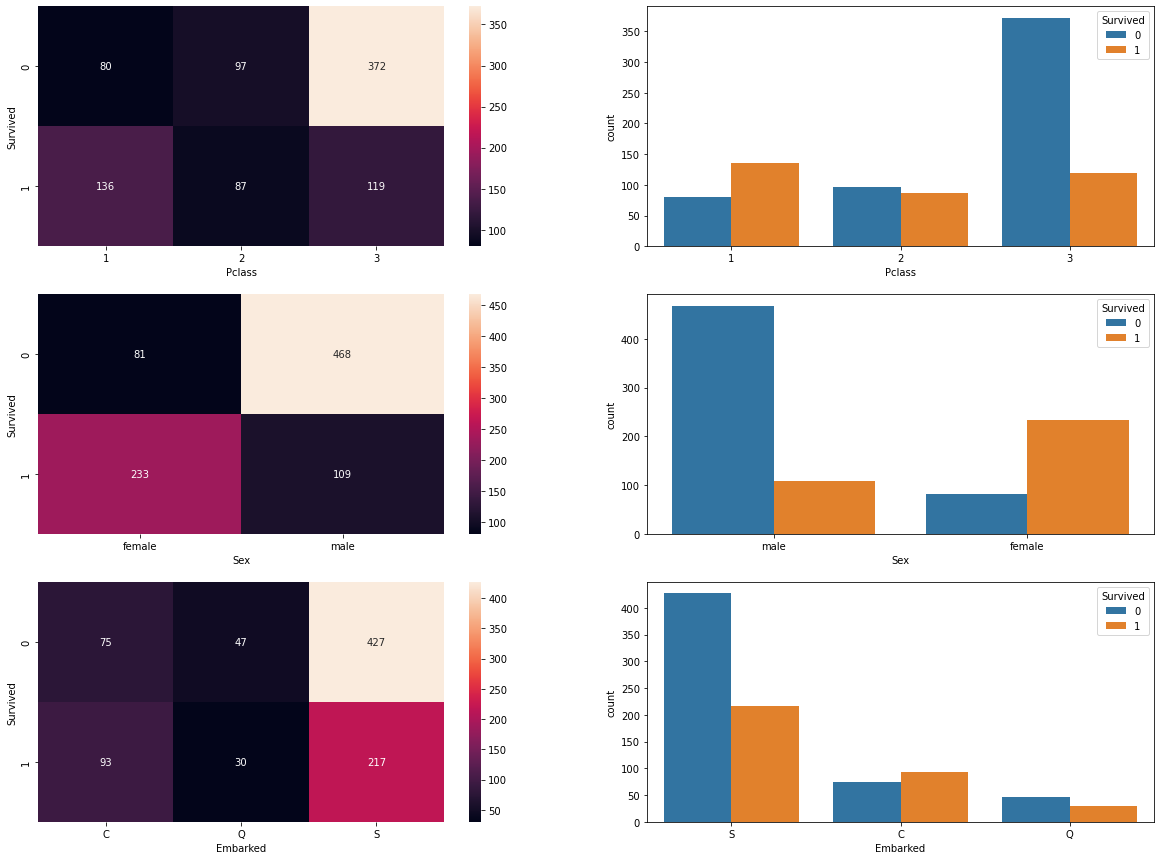

In [33]:
# Categorical variables /target 

pos =0
plt.figure(figsize = (20,15))
for col in ['Pclass', 'Sex', 'Embarked']:
    pos = pos + 1
    plt.subplot(3,2,pos)
    #print(pos)
    sns.heatmap(pd.crosstab(df_cat['Survived'] , df_cat[col]) , annot=True , fmt='d')
    pos = pos +1
    plt.subplot(3,2,pos)
    #print(pos)
    sns.countplot(x =col , hue = 'Survived' , data=df_cat )
    
plt.show()    

## 1.3 Analyse détaillé 

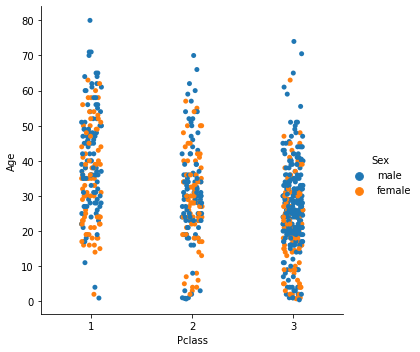

In [34]:
#variables/ variables relationship
sns.catplot(x = 'Pclass' , y='Age' , data =df , hue = 'Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

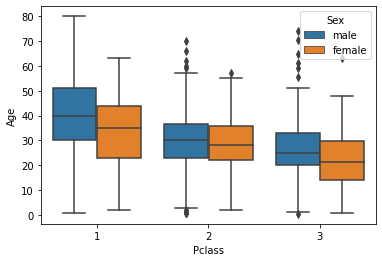

In [35]:
#variables/ variables relationship
sns.boxplot(x = 'Pclass' , y='Age' , data =df , hue = 'Sex')

<AxesSubplot:>

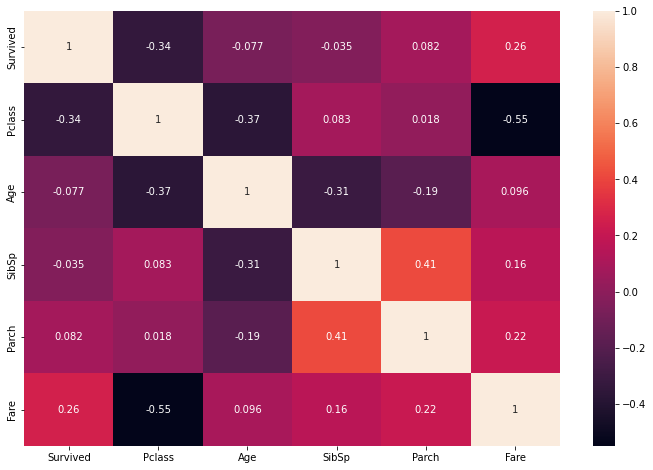

In [36]:
# variables/ variables relationship
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() ,annot=True)

In [39]:
#basic statistics for columns of data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2 Pre-processing

In [9]:
# create a copy of trainset for prep-processing
df1 = data.copy()

In [14]:
# Train , test
trainset , testset = train_test_split(df1, test_size = 0.2 , random_state = 0)

In [15]:
trainset['Survived'].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [16]:
testset['Survived'].value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [17]:
def clean(df):
  
    df.drop(['PassengerId' ,'Name' ,'Ticket','Cabin' ] , axis =1 , inplace = True)
    
    cols = ['Age' ,'Fare' , 'Parch' , 'SibSp']
    for col in cols:
      df[col].fillna(df[col].median( ), inplace=True)
        
    df['Embarked'].fillna('U' , inplace=True)    
    
    return df
    

In [18]:
def encodage(df):
    code = { 'male':1,
            'female':0,
            'S' :0,
            'C' :1,
            'Q' :2,
            'U' :4
            
        
    }
    
    for col in df.select_dtypes('object'):
     df[col] = df[col].map(code)
        
    return df    
    

In [19]:
def feature_engineering(df):
    
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df.drop(['SibSp','Parch'] , axis= 1 , inplace=True)
    
    return df
    

In [20]:
def preprocessing(df , test=False):
    
    df= clean(df)
    df= encodage(df)
    df = feature_engineering(df)
     
    if test:    
       return df
    else: 
        x = df.drop('Survived' , axis = 1)    
        y = df['Survived']
        
        print('data size', x.shape)
        print(y.value_counts())

        return x , y

In [22]:
x_train , y_train = preprocessing(trainset)
#trainset

data size (712, 6)
0    439
1    273
Name: Survived, dtype: int64


In [23]:
x_test , y_test = preprocessing(testset)

data size (179, 6)
0    110
1     69
Name: Survived, dtype: int64


# 4 Modelling

In [24]:
preprocessor = make_pipeline(PolynomialFeatures(2 ,include_bias=False) ,SelectKBest(k=10))

In [36]:
logictic_regression= make_pipeline(preprocessor ,
                                   LogisticRegression(random_state = 0) )

SVM = make_pipeline(preprocessor , StandardScaler(),
                   SVC(random_state = 0))

KNN = make_pipeline(preprocessor , StandardScaler(),
                    KNeighborsClassifier())

AdaBoost = make_pipeline(preprocessor , StandardScaler(),
                         AdaBoostClassifier(random_state = 0))

list_of_model = {'logictic Regession':logictic_regression , 
                 'svm': SVM, 
                 'KNN': KNN , 
                'AdaBoost':AdaBoost }



In [26]:
# evaltuation funtion
def evaluation(model):

        model.fit(x_train , y_train)
        y_pred = model.predict(x_test)
        #print(accuracy_score(y_test , y_pred)) 
        print(confusion_matrix(y_test , y_pred))
        print(classification_report(y_test , y_pred))
        
        # learning curve
        n , train_scores, val_scores = learning_curve(model , x_train , y_train , cv=4 ,
                                                      
                                                      train_sizes = np.linspace(0.1, 1 , 10) )
        
        # plot learning curve
        plt.figure(figsize = (10,8))
        plt.plot(n,train_scores.mean(axis=1) , label='Train-Curve')
        plt.plot(n,val_scores.mean(axis = 1) ,label='Val-Curve')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.title('Leanring Curve')
        plt.legend()
        plt.show()
      

logictic Regession


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[90 20]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      0.72      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

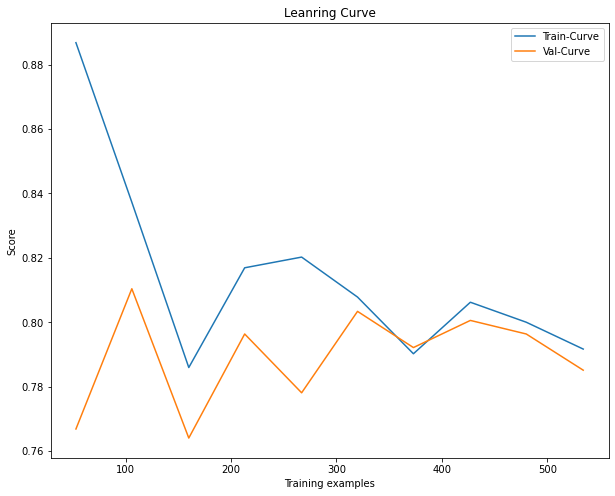

svm
[[95 15]
 [21 48]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



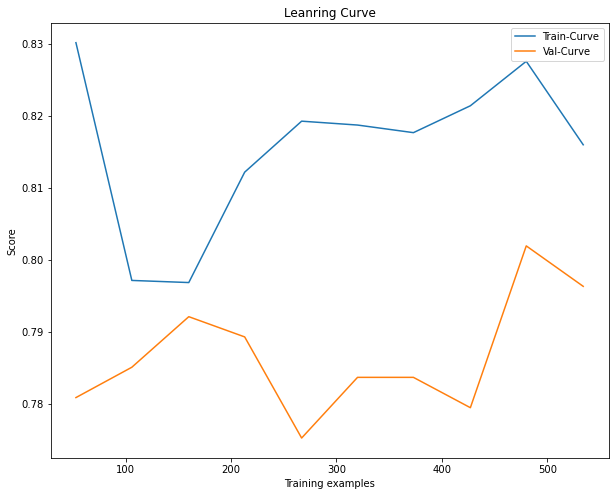

KNN
[[86 24]
 [17 52]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       110
           1       0.68      0.75      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



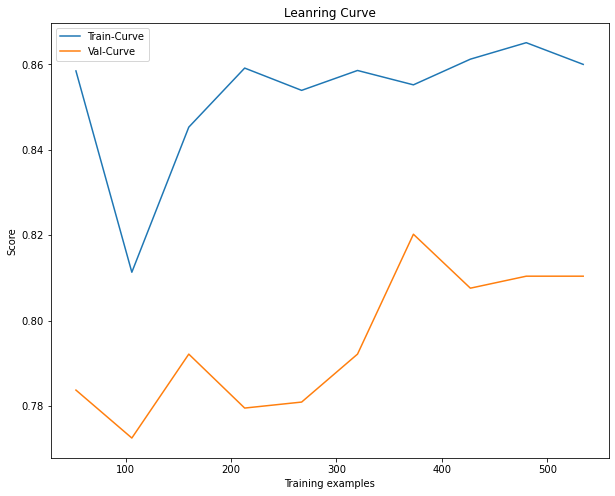

AdaBoost
[[101   9]
 [ 20  49]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



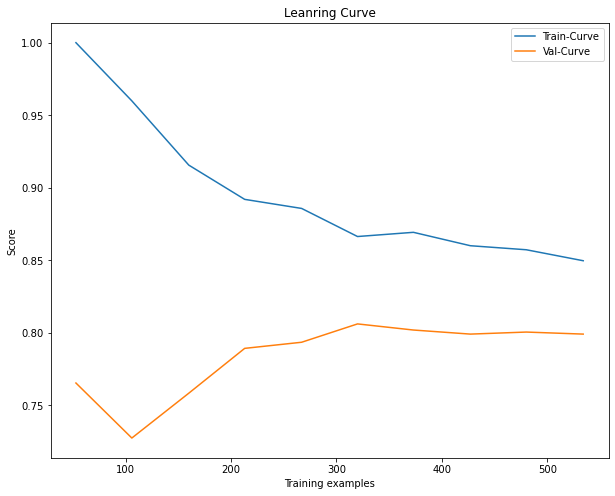

In [27]:
    for name , model in list_of_model.items():
        print(name)
        evaluation(model)
        

    + logictic Regession : 78%  accuracy 

    + SVM : 0.80 accuracy , recall 70%  & precision 76% for Survived = 1 

    + KNN :77% , recall 0.75%  & precision 68% for Survived = 1 , KNN il peut etre un bon choix on peut l'optimiser aussi je     pense qu'il donne des meilleurs résultats  surtt si l'on donne plus de données

    + AdaBoost : 84%  accuracy , recall 71 % , precision 84% pour Survived =1 , selon le learning curve  AdaBoost n'est pas en overfitting

    -->je préfère  optimiser le AdaBoost


# 4 Optimisation

In [37]:
hyper_params = {'pipeline__polynomialfeatures__degree': [2,3,4],
                #'pipeline__selectkbest__k':range(3 , 6),
                'adaboostclassifier__n_estimators':range(50, 80) ,
                'adaboostclassifier__learning_rate':[0.05, 0.1, 0.15, 0.2]
    
}
grid  = RandomizedSearchCV(AdaBoost ,hyper_params , n_iter=40, cv=4 )
grid.fit(x_train , y_train)
print(grid.best_params_)

{'pipeline__polynomialfeatures__degree': 3, 'adaboostclassifier__n_estimators': 74, 'adaboostclassifier__learning_rate': 0.05}


[[91 19]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.72      0.72      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



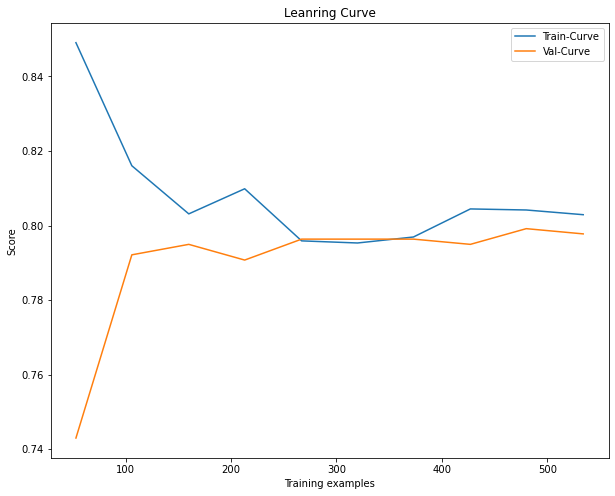

In [38]:
estimator = grid.best_estimator_
evaluation(estimator)

# submit predictions on  Kaggle

In [44]:
final_test_ids = final_test['PassengerId']
final_test = preprocessing(final_test , test=True)
final_test

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,34.5,7.8292,2,0
1,3,0,47.0,7.0000,0,1
2,2,1,62.0,9.6875,2,0
3,3,1,27.0,8.6625,0,0
4,3,0,22.0,12.2875,0,2
...,...,...,...,...,...,...
413,3,1,27.0,8.0500,0,0
414,1,0,39.0,108.9000,1,0
415,3,1,38.5,7.2500,0,0
416,3,1,27.0,8.0500,0,0


In [46]:
# final_test prediction
submit_pred= estimator.predict(final_test)

# create a DataFrame for final_test prediction
d = {'PassengerId':final_test_ids.values,
     'Survived':submit_pred}

dataframe = pd.DataFrame(data=d)

# create a  submission file 
dataframe.to_csv('submission.csv' , index=False)
 contains the correct predictions

In [49]:
# compare our predictions with Kaggle's predictions (gender_submission.cvs published by kaggle contains the correct predictions  )
sub_pred =pd.read_csv('submission.csv')
true_pred= pd.read_csv('gender_submission.csv')
accuracy_score(true_pred['Survived'] , sub_pred['Survived'])

0.9712918660287081

our goal is 90% and  we have 97% !

very good

